## Projeto 04 - Ténicas de Programação II

**Sobre o dataset**

- Título: Personal Key Indicators of Heart Disease
- Fonte: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

**Variáveis**
- HeartDisease: Os entrevistados que já relataram ter doença cardíaca coronária (DAC) ou infarto do miocárdio (IM).
- BMI: Índice de Massa Corporal (IMC).
- Smoking: Você fumou pelo menos 100 cigarros em toda a sua vida?
- AlcoholDrinking: bebedores pesados ​​(homens adultos que bebem mais de 14 bebidas por semana e mulheres adultas que bebem mais de 7 bebidas por semana
- Stroke: (Já disse ter) (você teve) um derrame?
- PhysicalHealth: Agora, pensando em sua saúde física, que inclui doenças e lesões físicas, por quantos dias nos últimos 30 dias sua saúde física não foi boa? (0-30 dias).
- MentalHealth: Pensando em sua saúde mental, por quantos dias nos últimos 30 dias sua saúde mental não foi boa? (0-30 dias).
- DiffWalking: Você tem sérias dificuldades para caminhar ou subir escadas?
- Sex: Você é homem ou mulher?
- AgeCategory: categoria de idade de quatorze níveis. (então calculou a média)
- Race: valor de raça/etnia imputado.
- Diabetic: (Já disse ter) (você tinha) diabetes?
- PhysicalActivity: Adultos que relataram ter feito atividade física ou exercício nos últimos 30 dias fora do trabalho regular.
- GenHealth: Você diria que em geral sua saúde é...
- SleepTime: Em média, quantas horas de sono você dorme em um período de 24 horas?
- Asthma: (Já disse ter) (você teve) asma?
- KidneyDisease: Não incluindo cálculos renais, infecção da bexiga ou incontinência, você já foi informado de que tinha doença renal?
- SkinCancer: (Já disse ter) (você teve) câncer de pele?

Visão Geral: Pesquisa do CDC de 2020 com 400 adultos, sobre saúde. A motivação é que pelo menos metade dos estadunidenses possuem pelo menos 1 dos 3 fatores de risco para possuir uma doença cardíaca: pressão alta, colesterol alto e tabagismo.
O conjunto original possuia 300 variáveis, mas no DF atual só possui 20, entre elas 9 variáveis booleanas, 5 strings e 4 decimais.

**Perguntas**
1. Quais variáveis mais influenciam doenças do coração?
2. Pessoas que fazem mais exercícios físicos têm menos chances de ter doenças cardíacas ou derrames?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df_raw = pd.read_csv("./data/heart_2020_cleaned.csv")
df_raw.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

In [3]:
# Trocando "Yes" por True e "No" por False
def yes_no_bool(s: str):
    if s == "Yes": return True
    elif s == "No": return False
    else: return s

df_raw = df_raw.applymap(yes_no_bool)
df_raw.head()

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0         False  16.60     True            False   False             3.0   
1         False  20.34    False            False    True             0.0   
2         False  26.58     True            False   False            20.0   
3         False  24.21    False            False   False             0.0   
4         False  23.71    False            False   False            28.0   

   MentalHealth  DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0        False  Female        55-59  White     True   
1           0.0        False  Female  80 or older  White    False   
2          30.0        False    Male        65-69  White     True   
3           0.0        False  Female        75-79  White    False   
4           0.0         True  Female        40-44  White    False   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0              True  Very good        5.0    True          False        True  
1              True  Very good        7.0   False          False       False  
2              True       Fair        8.0    True          False       False  
3             False       Good        6.0   False          False        True  
4              True  Very good        8.0   False          False       False

In [4]:
df_raw.describe()

BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000

In [13]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  bool   
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  bool   
 3   AlcoholDrinking   319795 non-null  bool   
 4   Stroke            319795 non-null  bool   
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  bool   
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  bool   
 12  PhysicalActivity  319795 non-null  bool   
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  bool   
 16  KidneyDisease     31

In [6]:
df_raw.replace({'Diabetic': {'No, borderline diabetes': False}}, inplace=True)
df_raw.replace({'Diabetic': {'Yes (during pregnancy)': True}}, inplace=True)

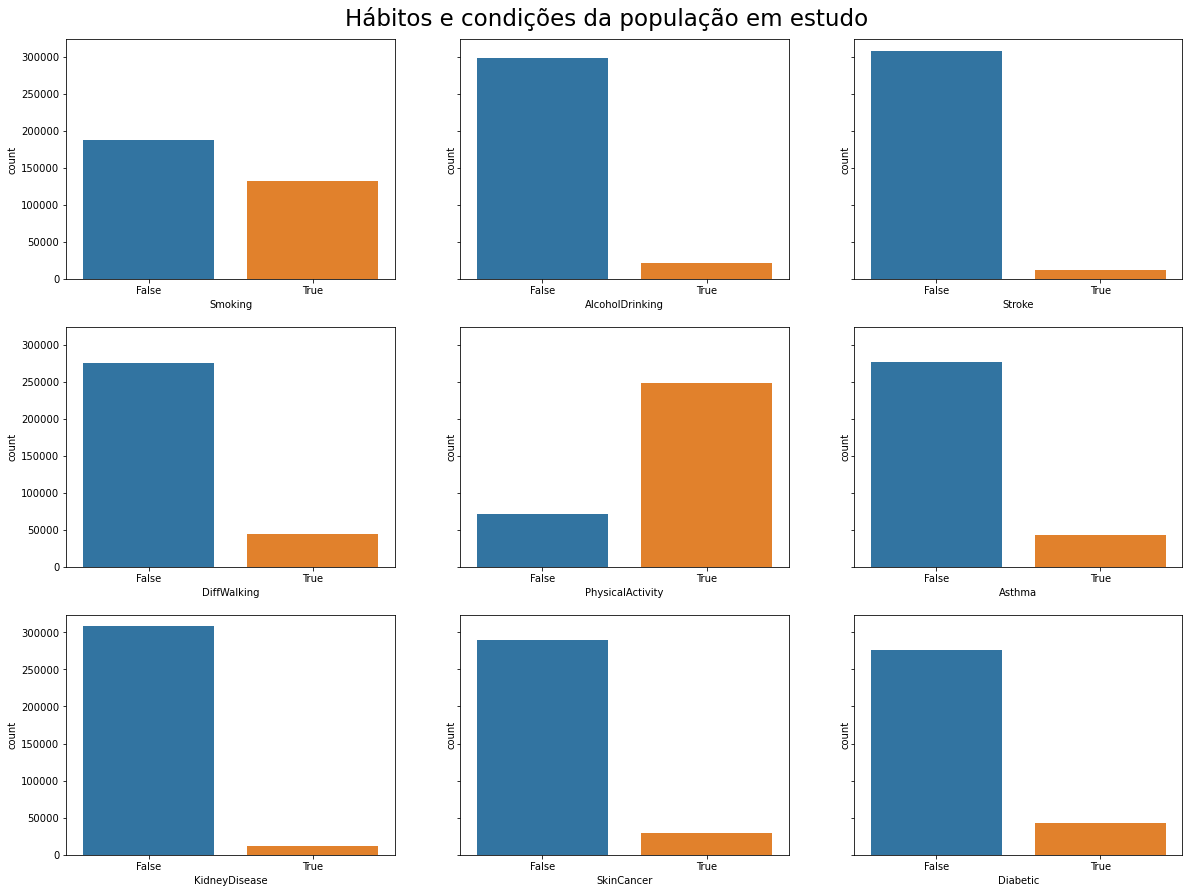

In [7]:
fig, axs = plt.subplots(3,3, figsize=(20,15), sharey = True)

fig.suptitle('Hábitos e condições da população em estudo', fontsize = 23, y = 0.91)

sns.countplot(x = df_raw['Smoking'], ax=axs[0][0])
sns.countplot(x = df_raw['AlcoholDrinking'], ax=axs[0][1])
sns.countplot(x = df_raw['Stroke'], ax=axs[0][2])
sns.countplot(x = df_raw['DiffWalking'], ax=axs[1][0])
sns.countplot(x = df_raw['PhysicalActivity'], ax=axs[1][1])
sns.countplot(x = df_raw['Asthma'], ax=axs[1][2])
sns.countplot(x = df_raw['KidneyDisease'], ax=axs[2][0])
sns.countplot(x = df_raw['SkinCancer'], ax=axs[2][1])
sns.countplot(x = df_raw['Diabetic'], ax=axs[2][2])
plt.show()



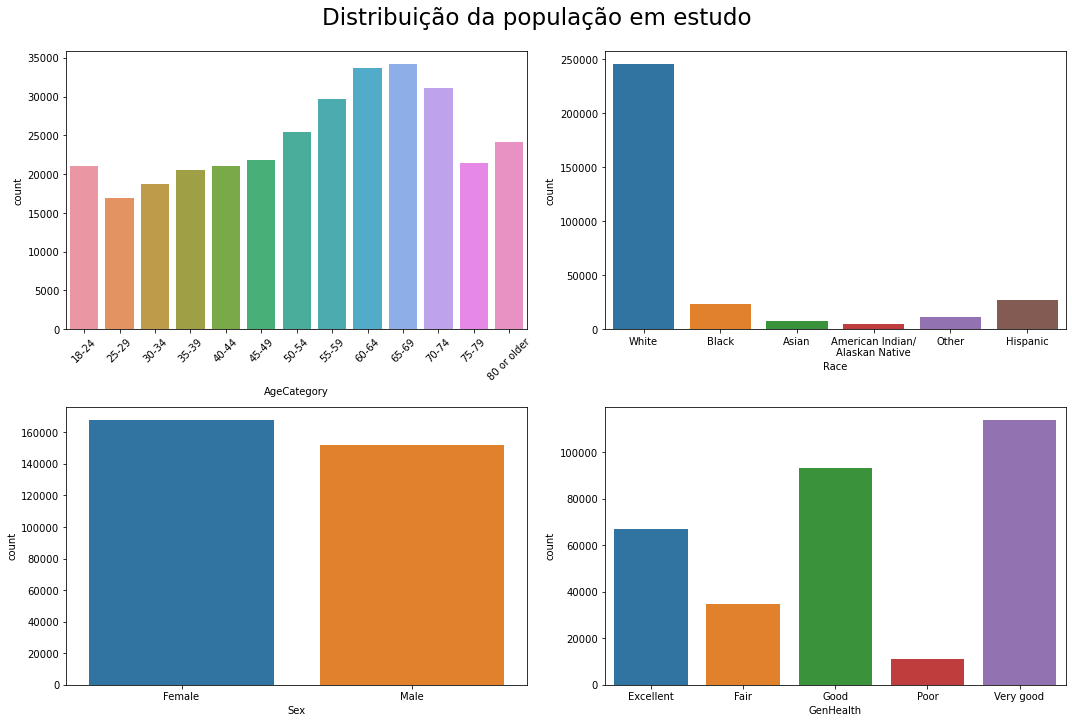

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle('Distribuição da população em estudo', fontsize = 23, y = 1.0)

f1 = sns.countplot(x = df_raw.sort_values('AgeCategory')['AgeCategory'], ax=ax[0][0])
f1.set_xticklabels(labels=df_raw.sort_values('AgeCategory')['AgeCategory'].unique(), rotation=45)
f2 = sns.countplot(x = df_raw['Race'], ax=ax[0][1])
f2.set_xticklabels(labels=['White', 'Black', 'Asian', 'American Indian/\nAlaskan Native','Other', 'Hispanic']) 
f3 = sns.countplot(x = df_raw['Sex'], ax=ax[1][0])
f3.set_xticklabels(labels=df_raw['Sex'].unique()) 
f4 = sns.countplot(x = df_raw.sort_values('GenHealth')['GenHealth'], ax=ax[1][1])
f4.set_xticklabels(labels=df_raw.sort_values('GenHealth')['GenHealth'].unique())
fig.tight_layout()
plt.show()

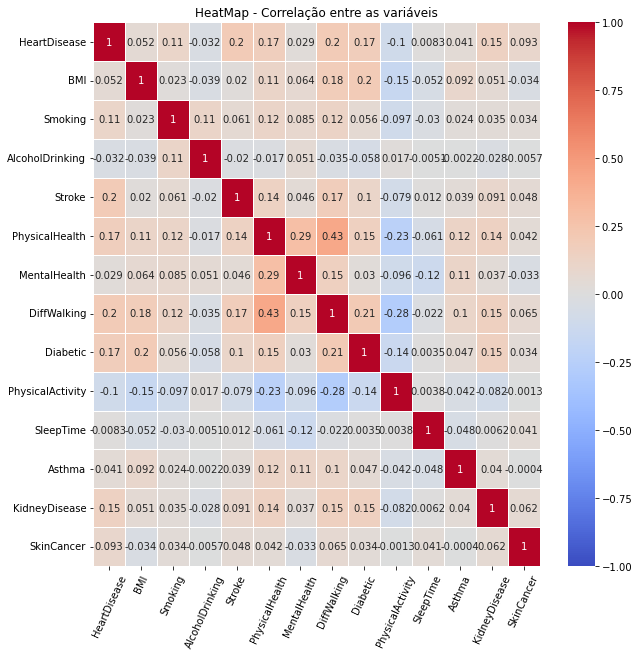

In [9]:
plt.figure(figsize=(10,10))
heat_map = sns.heatmap(df_raw.corr(), linewidth = 1, cmap = 'coolwarm', vmax = 1, vmin = -1, annot = True)
heat_map.set_xticklabels(labels = list(df_raw.drop(columns = ['Sex', 'AgeCategory','Race','GenHealth']).columns), rotation = 65)
plt.title( "HeatMap - Correlação entre as variáveis" );

In [11]:
df_raw[['MentalHealth','PhysicalHealth','SleepTime', 'BMI']]

MentalHealth  PhysicalHealth  SleepTime    BMI
0               30.0             3.0        5.0  16.60
1                0.0             0.0        7.0  20.34
2               30.0            20.0        8.0  26.58
3                0.0             0.0        6.0  24.21
4                0.0            28.0        8.0  23.71
...              ...             ...        ...    ...
319790           0.0             7.0        6.0  27.41
319791           0.0             0.0        5.0  29.84
319792           0.0             0.0        6.0  24.24
319793           0.0             0.0       12.0  32.81
319794           0.0             0.0        8.0  46.56

[319795 rows x 4 columns]

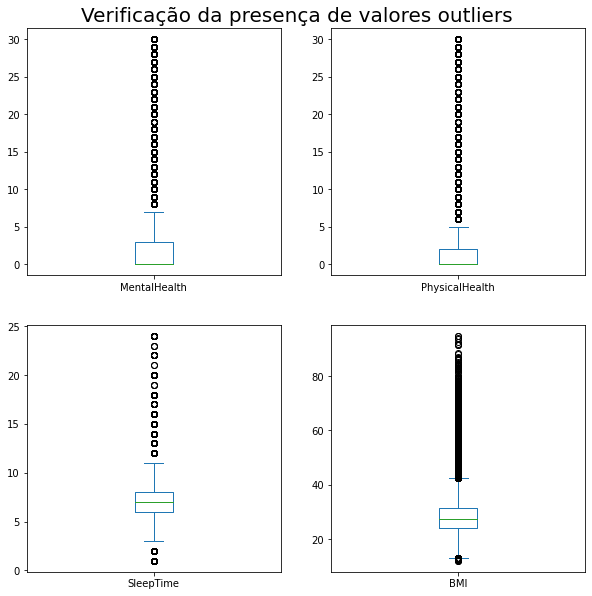

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

fig.suptitle('Verificação da presença de valores outliers', fontsize = 20, y = 0.91)

f1 = df_raw['MentalHealth'].plot(kind = 'box', ax=axs[0][0])
f2 = df_raw['PhysicalHealth'].plot(kind = 'box', ax=axs[0][1])
f3 = df_raw['SleepTime'].plot(kind = 'box', ax=axs[1][0])
f4 = df_raw['BMI'].plot(kind = 'box', ax=axs[1][1])

plt.show()

In [28]:
sort_age = df_raw.sort_values('AgeCategory') 

px.histogram(sort_age[sort_age['HeartDisease']], 'AgeCategory', nbins=50, histnorm = 'probability density')



In [30]:
px.histogram(sort_age[~sort_age['HeartDisease']], 'AgeCategory', nbins=50, histnorm = 'probability density')

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(25,10))

fig.suptitle('Ditribuição da variável montante de dívida', fontsize=15, y=1.01)
axs[0].hist(bins=15, x=sort_age[sort_age['HeartDisease']].AgeCategory, color='#1982C4')
axs[0].set_title('Histograma', fontsize=10)

axs[1].hist(sort_age[~sort_age['HeartDisease']].AgeCategory)
axs[1].set_title('Boxplot', fontsize=10);